# Medical Cost Prediction

The aim of this analysis is to predict the medical expense based on the patients'information. The dataset used for this analysis is Insurance dataset from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance). The dataset contains 1338 observations and 7 variables. The variables are as follows:


| Variable | Description |
| --- | --- |
| age | age of primary beneficiary |
|bmi | body mass index |
|children | number of children covered by health insurance |
|smoker | smoking |
|region | the beneficiary's residential area in the US |
|charges | individual medical costs billed by health insurance |

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('/Users/lenovo1/Downloads/Ironhack/final_project/Data_Raw/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Preprocessing

In [3]:
#number of rows and columns
df.shape

(1338, 7)

In [4]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#checking discriptive statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#value counts for categorical variables
print(df.sex.value_counts(),'\n',df.smoker.value_counts(),'\n',df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64 
 smoker
no     1064
yes     274
Name: count, dtype: int64 
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


Replacing the categorical variables with numerical values.
- sex : 1 - male, 0 - female
- smoker : 1 - yes, 0 - no
- region : 0 - northeast, 1 - northwest, 2 - southeast, 3 - southwest

In [7]:
#changing categorical variables to numerical
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [8]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


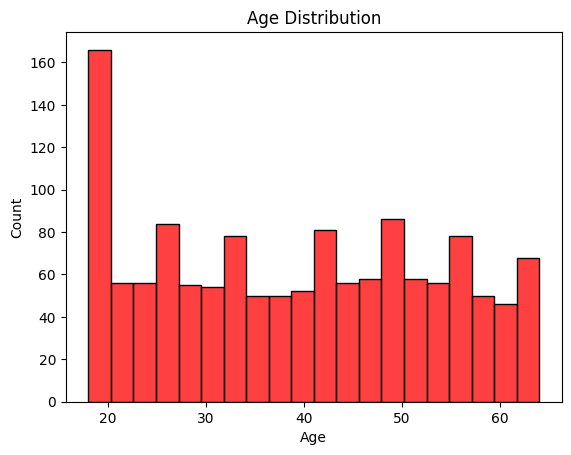

In [9]:
#age distribution
sns.histplot(df.age,bins=20, kde=False,color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

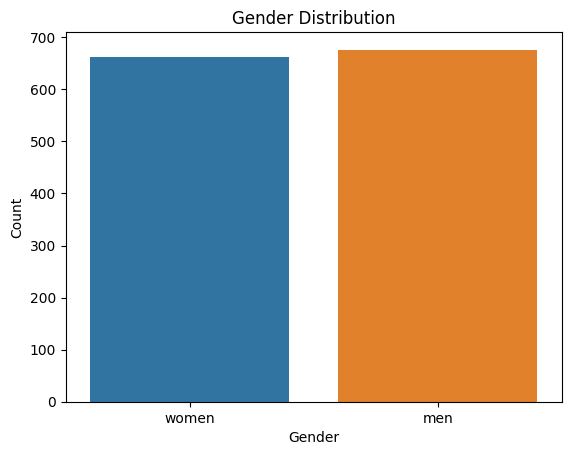

In [10]:
#gender plot
label_to_gender = {
    0: 'women',
    1: 'men'
}

# Map the 'sex' column in the DataFrame to gender labels
df['sex'] = df['sex'].map(label_to_gender)

# Create the count plot for gender distribution
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

It is clear that number of males and females are almost equal in the dataset.

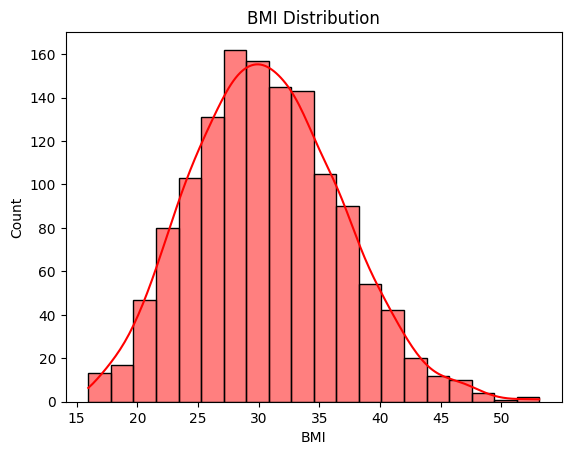

In [11]:
#bmi distribution
sns.histplot(df.bmi,bins=20, kde=True,color='red')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

The majority of the patients have BMI between 25 and 40 which is considered as overweight and could be a major factor in increasing the medical cost.

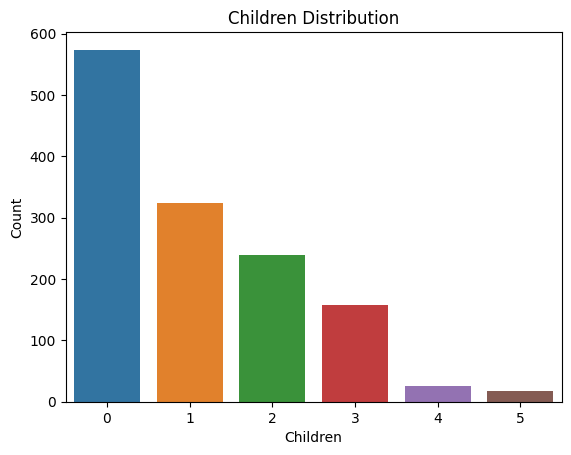

In [12]:
#child count distribution
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

The graph clearly shows that most of the patients have no children and very few patients have more than 3 children.

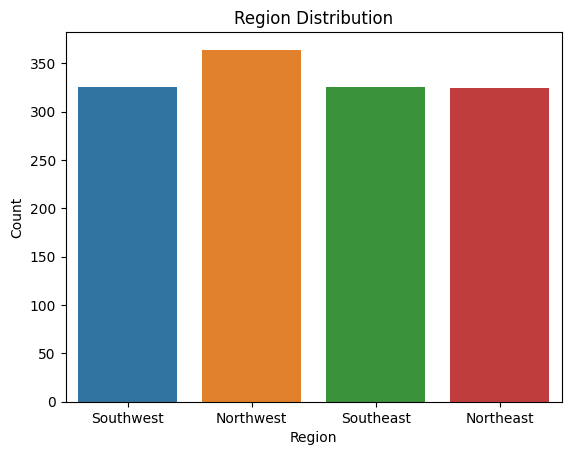

In [13]:
#regionwise plot

number_to_region = {
    0: 'Southwest',
    2: 'Southeast',
    1: 'Northwest',
    3: 'Northeast'
}

# Map the 'region' column in the DataFrame to region names
df['region'] = df['region'].map(number_to_region)

# Create the region-wise plot
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


The count of patient from northwest is slighltly higher than the other regions, but the number of patients from other regions are almost equal.

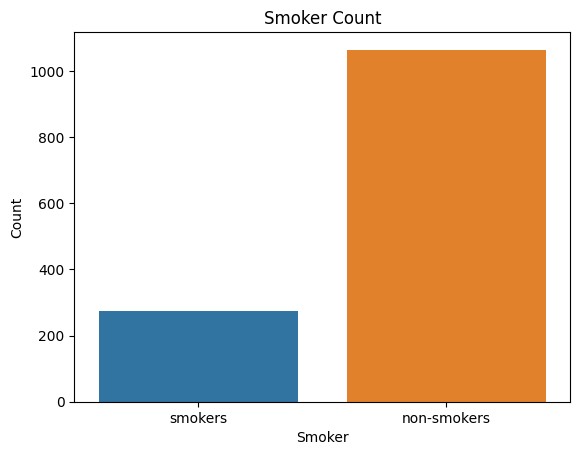

In [14]:
number_to_label = {
    0: 'non-smokers',
    1: 'smokers'
}

# Map the 'smoker' column in the DataFrame to labels
df['smoker'] = df['smoker'].map(number_to_label)

# Create the count plot for smokers
sns.countplot(x='smoker', data=df)
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

smokers are very few in the dataset. Nearly 80% of the patients are non-smokers.

Here we can see that people without children smokes more than people with children, and also men smokes more then women. 

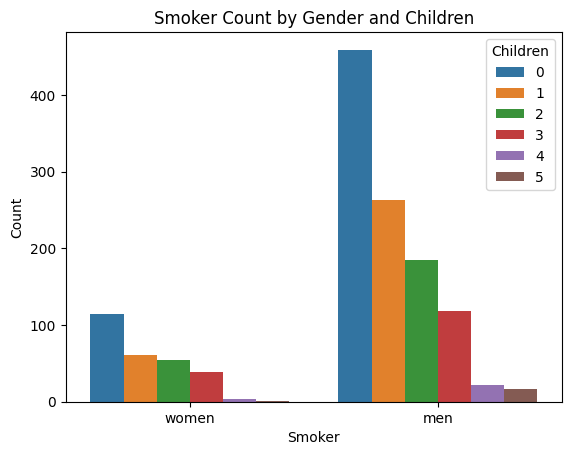

In [15]:
label_to_gender = {
    'non-smokers': 'men',
    'smokers': 'women'
}

# Map the 'smoker' column in the DataFrame to gender labels
df['smoker'] = df['smoker'].map(label_to_gender)

# Create the count plot with hue based on 'children' column
sns.countplot(x='smoker', hue='children', data=df)
plt.title('Smoker Count by Gender and Children')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.legend(title='Children')
plt.show()

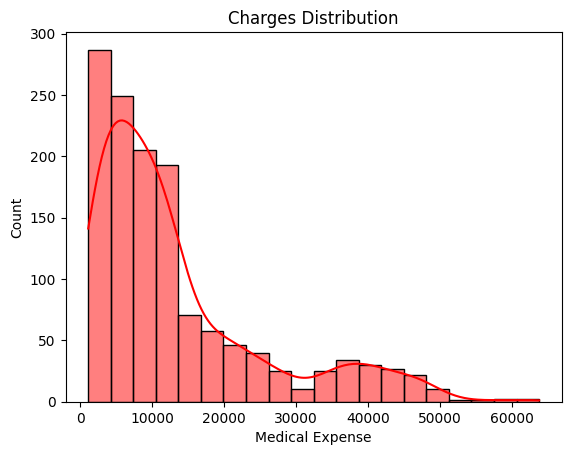

In [16]:
#charges distribution
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

Most of the medical expenses are below 20000, with negligible number of patients having medical expenses above 50000.
From all the above plots, we have a clear understanding about the count of patients under each category of the variables. 

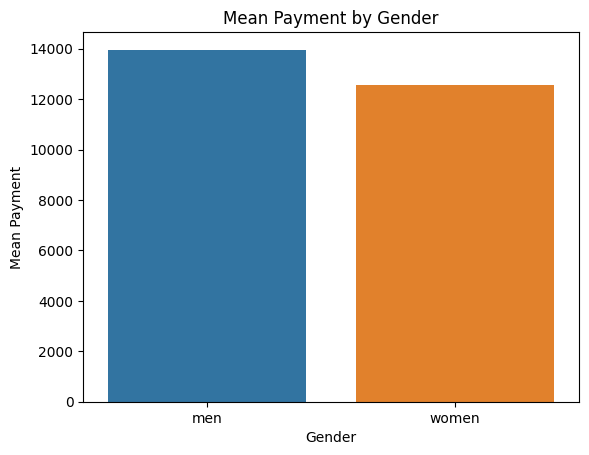

In [17]:
# Calculate mean payment for each gender
mean_payment_by_gender = df.groupby('sex')['charges'].mean()

# Create a bar plot for mean payment by gender
sns.barplot(x=mean_payment_by_gender.index, y=mean_payment_by_gender.values)
plt.title('Mean Payment by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Payment')
plt.show()  # Display the plot

Here we can see that men pays more than women.

# Coorelation

In [18]:
df = pd.read_csv('/Users/lenovo1/Downloads/Ironhack/final_project/Data_Raw/mcp_preprocessed.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [19]:
#coorelation matrix
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


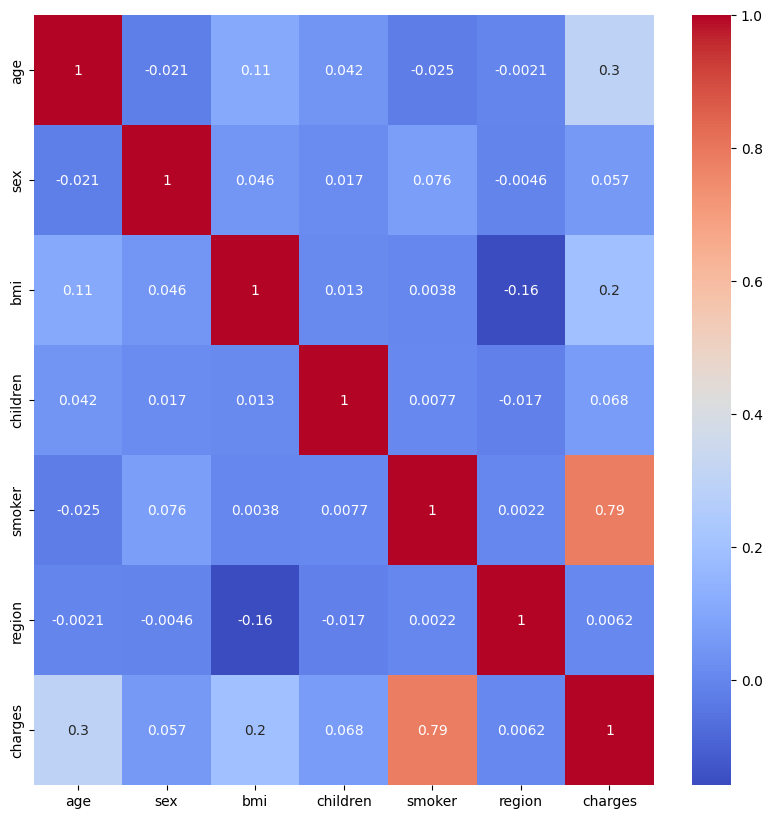

In [20]:
#plotting the coorelation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

The variable smoker shows a significant coorelation with the medical expenses. Now I will explore more into patients' smoking habits and their relation with other factors.

# Plotting the smoker count with patient's gender

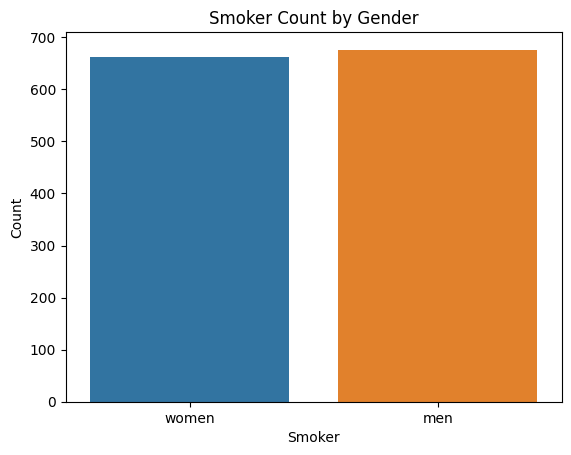

In [21]:
number_to_label = {
    0: 'women',
    1: 'men'   
}

# Map the 'smoker' column in the DataFrame to labels
df['sex'] = df['sex'].map(number_to_label)


# Create the count plot for smokers
sns.countplot(x='sex', data=df)
plt.title('Smoker Count by Gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

We can notice more male smokers than female smokers. So, I will assume that medical treatment expense for males would be more than females, given the impact of smoking on the medical expenses.

# Smokers and age distribution

/Users/lenovo1/final_project/final_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x500 with 0 Axes>

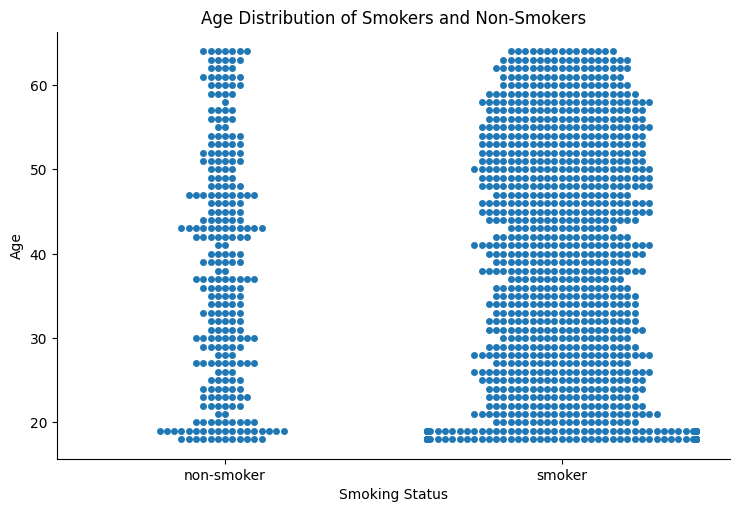

In [22]:
# Define a dictionary to map numbers to smoker labels
number_to_label = {
    0: 'smoker',
    1: 'non-smoker'
}

# Map the 'smoker' column in the DataFrame to labels
df['smoker'] = df['smoker'].map(number_to_label)

# Create a categorical scatter plot to visualize age distribution of smokers and non-smokers
plt.figure(figsize=(8, 5))
sns.catplot(x="smoker", y="age", kind="swarm", data=df, height=5, aspect=1.5)

# Set labels and title for the plot
plt.title("Age Distribution of Smokers and Non-Smokers")
plt.xlabel('Smoking Status')
plt.ylabel('Age')

# Show the plot
plt.show()

#histogram of displayd by age


<Axes: xlabel='age', ylabel='Count'>

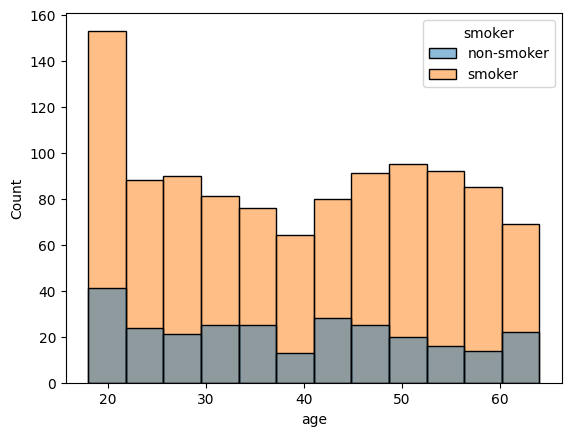

In [23]:
sns.histplot(data=df, x="age", hue="smoker")

From the graph, we can see that there significant number of smokers of age 19. 

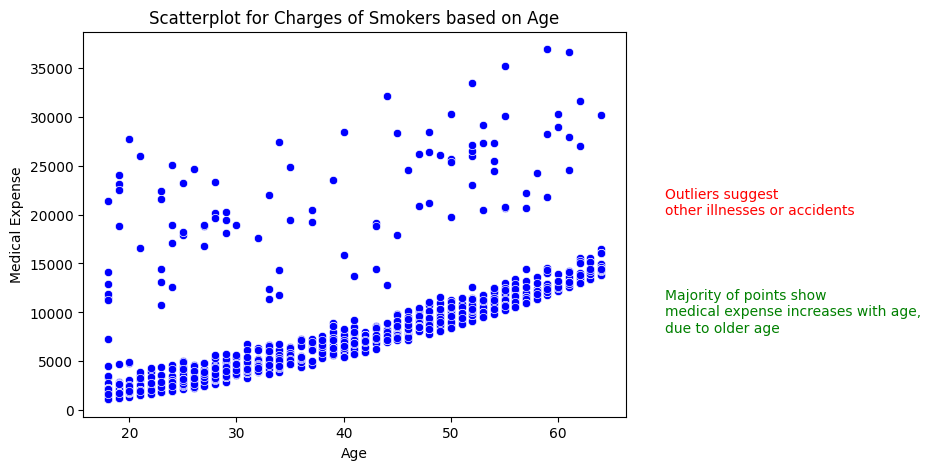

In [24]:
#import matplotlib.pyplot as plt
#import seaborn as sns

plt.figure(figsize=(7, 5))
plt.title("Scatterplot for Charges of Smokers based on Age")

# Create a scatter plot to visualize charges of smokers based on age
sns.scatterplot(x="age", y="charges", data=df[df['smoker'] == 'smoker'], marker='o', color='blue')

# Set labels for the plot
plt.xlabel('Age')
plt.ylabel('Medical Expense')

# Add annotations for the observed patterns
plt.text(70, 8000, "Majority of points show\nmedical expense increases with age,\ndue to older age", fontsize=10, color='green')
plt.text(70, 20000, "Outliers suggest\nother illnesses or accidents", fontsize=10, color='red')

# Show the plot
plt.show()


Majority of the points shows that medical expense increases with age which may be due to the fact that older people are more prone to illness. But there are some outliners which shows that there are other illness or accidents which may increase the medical expense.

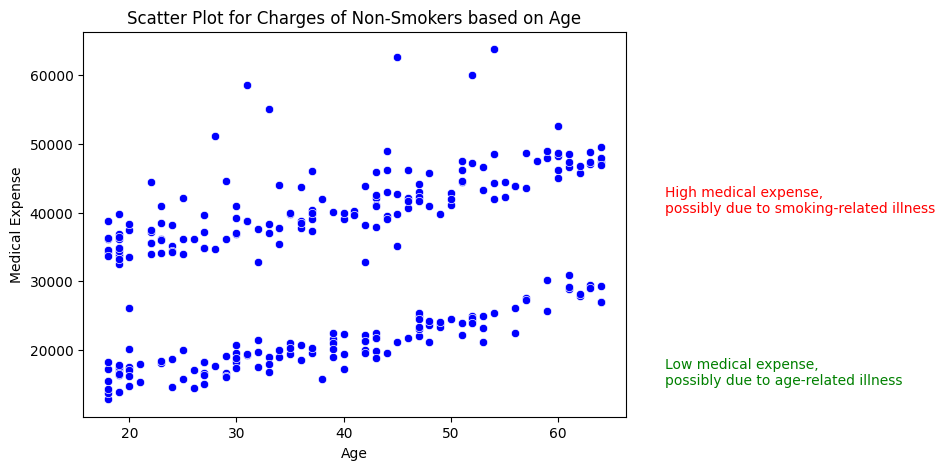

In [25]:

plt.figure(figsize=(7, 5))
plt.title("Scatter Plot for Charges of Non-Smokers based on Age")

# Create a scatter plot to visualize charges of non-smokers based on age
sns.scatterplot(x="age", y="charges", data=df[df['smoker'] == 'non-smoker'], marker='o', color='blue')

# Set labels for the plot
plt.xlabel('Age')
plt.ylabel('Medical Expense')

# Add annotation for the observed patterns
plt.text(70, 40000, "High medical expense,\npossibly due to smoking-related illness", fontsize=10, color='red')
plt.text(70, 15000, "Low medical expense,\npossibly due to age-related illness", fontsize=10, color='green')

# Show the plot
plt.show()


Here we see pecularity in the graph. In the graph there are two segments, one with high medical expense which may be due to smoking related illness and the other with low medical expense which may be due age related illness.

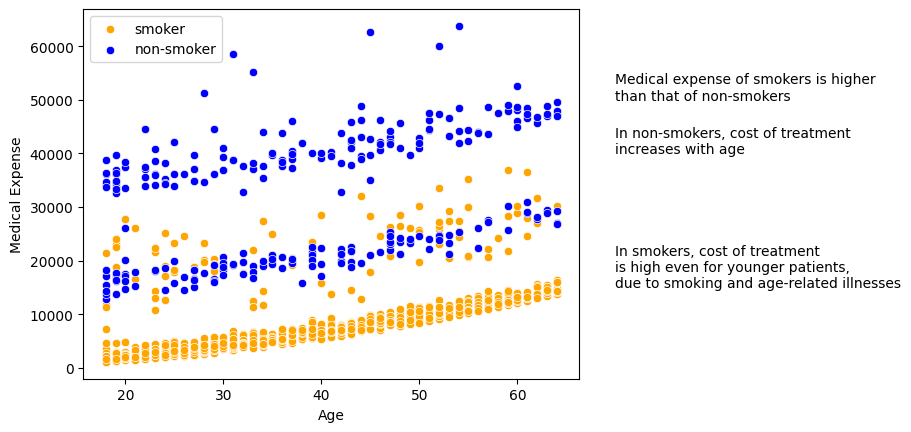

In [26]:

# Set the custom colors for smokers and non-smokers
custom_palette = {'smoker': 'orange', 'non-smoker': 'blue'}

# Create scatter plots for smokers and non-smokers
sns.scatterplot(x='age', y='charges', data=df[df['smoker'] == 'smoker'], color='orange', label='smoker')
sns.scatterplot(x='age', y='charges', data=df[df['smoker'] == 'non-smoker'], color='blue', label='non-smoker')

# Set the labels for x and y axes
plt.xlabel('Age')
plt.ylabel('Medical Expense')

# Add annotation for the observed patterns
plt.text(70, 50000, "Medical expense of smokers is higher\nthan that of non-smokers", fontsize=10, color='black')
plt.text(70, 40000, "In non-smokers, cost of treatment\nincreases with age", fontsize=10, color='black')
plt.text(70, 15000, "In smokers, cost of treatment\nis high even for younger patients,\ndue to smoking and age-related illnesses", fontsize=10, color='black')

# Show the legend
plt.legend()

# Show the plot
plt.show()


Now, we clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers.
In non-smokers, the cost of treatment increases with age which is obvious. But in smokers, the cost of treatment is high even for younger patients, which means the smoking patients are spending upon their smoking related illness as well as age related illness.

In [27]:
df.groupby(["smoker"])['charges'].mean()

smoker
non-smoker    32050.231832
smoker         8434.268298
Name: charges, dtype: float64

In [28]:
# Two sample, two population t-test.
# H0 mean_smoker = mean_no_smoker
# H1 mean_smoker != mean_no_smoker

In [29]:
from scipy.stats import ttest_ind

# Extract charges for smokers and non-smokers
charges_smoker = df[df['smoker'] == 'smoker']['charges']
charges_non_smoker = df[df['smoker'] == 'non-smoker']['charges']

# Perform the t-test
t_statistic, p_value = ttest_ind(charges_smoker, charges_non_smoker, equal_var=False)

# Define the significance level
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis: Mean charges for smokers and non-smokers are not equal.")
else:
    print("Fail to reject null hypothesis: Mean charges for smokers and non-smokers are equal.")


T-statistic: -32.751887766341824
P-value: 5.88946444671698e-103
Reject null hypothesis: Mean charges for smokers and non-smokers are not equal.


# Charges distribution for patients with BMI greater than 30 that is obese patients

/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62190/836969744.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi >= 30)]['charges'])


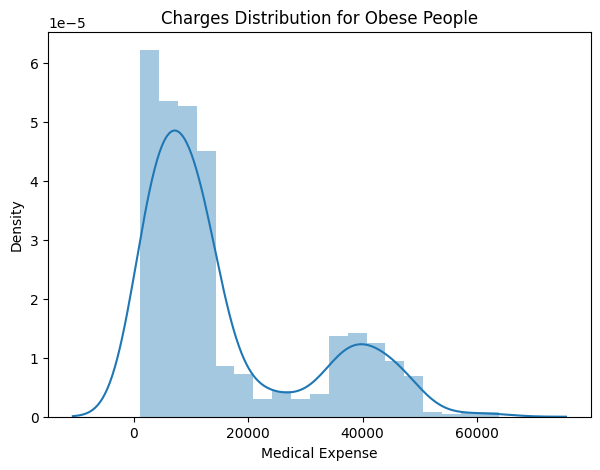

In [30]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

# Charges distribution for patients with BMI less than 30 that is healthy patients

/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62190/887406048.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi < 30)]['charges'])


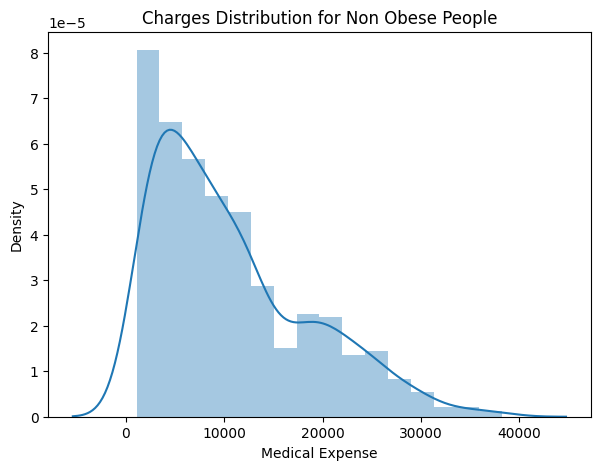

In [31]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

Therefore, patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30.

In [32]:
df = pd.read_csv('/Users/lenovo1/Downloads/Ironhack/final_project/Data_Raw/mcp_preprocessed.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('charges',axis=1), df['charges'], test_size=0.2, random_state=0)

# Model Building

In [34]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [35]:
#model training
lr.fit(x_train,y_train)
#model accuracy
lr.score(x_train,y_train)

0.7368306228430944

In [36]:
#model prediction
y_pred = lr.predict(x_test)

In [37]:
#Linear regression
results = pd.DataFrame({"Set": ["Train"]*x_train.shape[0] + ["Test"]*x_test.shape[0],
             "y_real": y_train.values.tolist() + y_test.values.tolist(),
             "y_pred_lm": lr.predict(x_train).tolist() + lr.predict(x_test).tolist() })
results

,Set,y_real,y_pred_lm
0,Train,40182.24600,33388.190268
1,Train,1137.46970,3615.429843
2,Train,38511.62830,30678.690738
3,Train,4670.64000,8023.135810
4,Train,13019.16105,14151.875606
...,...,...,...
1333,Test,15019.76005,14699.098767
1334,Test,6664.68595,8210.854549
1335,Test,20709.02034,16019.284542
1336,Test,40932.42950,33104.944084


In [38]:
#  K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn

KNeighborsRegressor()

In [39]:
# Model training
knn.fit(x_train, y_train)
#model accuracy
knn.score(x_train, y_train)

0.392282505312589

In [40]:
# Model prediction
knn_pred = knn.predict(x_test)

In [41]:
# K-Nearest Neighbors (KNN)
results = pd.DataFrame({"Set": ["Train"]*x_train.shape[0] + ["Test"]*x_test.shape[0],
             "y_real": y_train.values.tolist() + y_test.values.tolist(),
             "y_pred_knn": knn.predict(x_train).tolist() + knn.predict(x_test).tolist() })
results

,Set,y_real,y_pred_knn
0,Train,40182.24600,26387.033200
1,Train,1137.46970,3205.891130
2,Train,38511.62830,24310.724200
3,Train,4670.64000,18245.556240
4,Train,13019.16105,12626.344100
...,...,...,...
1333,Test,15019.76005,20374.120836
1334,Test,6664.68595,10057.845170
1335,Test,20709.02034,11317.910810
1336,Test,40932.42950,14255.497064


In [42]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [43]:
#model training
rf.fit(x_train,y_train)
#model accuracy
rf.score(x_train,y_train)

0.9735589596462817

In [44]:
#model prediction
rf_pred = rf.predict(x_test)

In [45]:
#random forest regressor
results = pd.DataFrame({"Set": ["Train"]*x_train.shape[0] + ["Test"]*x_test.shape[0],
             "y_real": y_train.values.tolist() + y_test.values.tolist(),
             "y_pred_rf": rf.predict(x_train).tolist() + rf.predict(x_test).tolist() })
results

,Set,y_real,y_pred_rf
0,Train,40182.24600,39873.073509
1,Train,1137.46970,1459.200352
2,Train,38511.62830,38102.454429
3,Train,4670.64000,4930.365179
4,Train,13019.16105,12729.782420
...,...,...,...
1333,Test,15019.76005,16324.832440
1334,Test,6664.68595,6537.241571
1335,Test,20709.02034,11423.195617
1336,Test,40932.42950,42618.736239


# Model Evaluation

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Linear regression

/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62190/3899792752.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_errors, hist=False, color='b', ax=ax2)
/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62190/3899792752.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

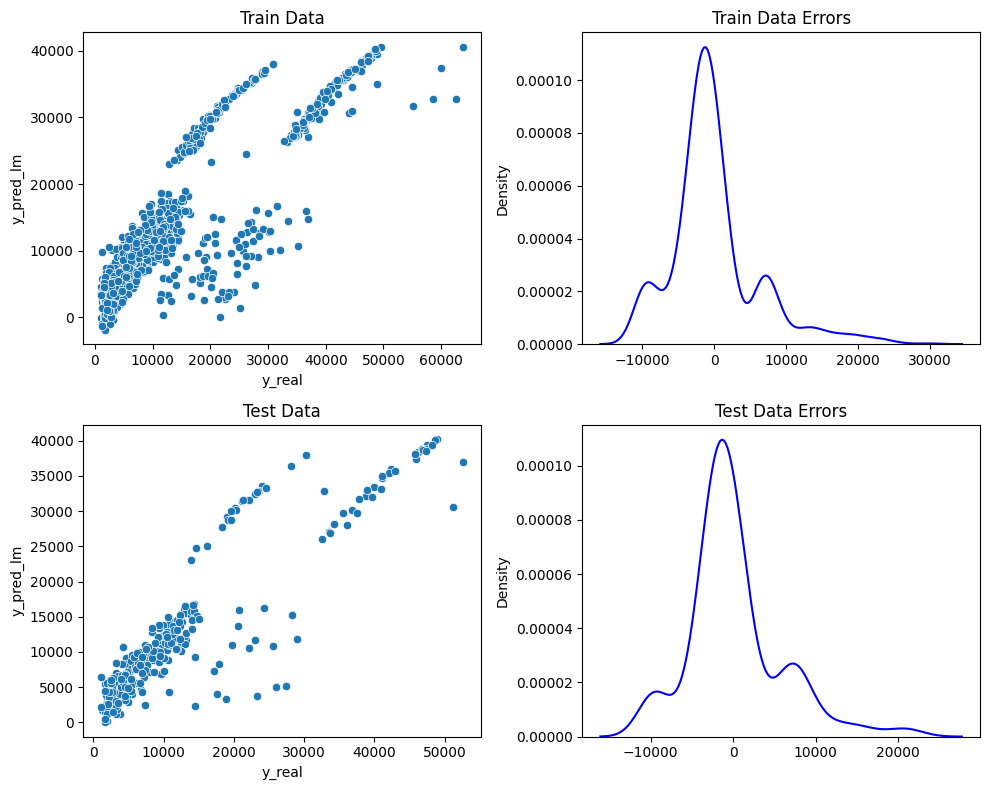

In [47]:
# Assuming you have x_train, y_train, x_test, y_test, lr defined somewhere

# Create results DataFrame
results = pd.DataFrame({
    "Set": ["Train"] * x_train.shape[0] + ["Test"] * x_test.shape[0],
    "y_real": y_train.values.tolist() + y_test.values.tolist(),
    "y_pred_lm": lr.predict(x_train).tolist() + lr.predict(x_test).tolist()
})

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot for training data
sns.scatterplot(data=results[results["Set"] == "Train"], x="y_real", y="y_pred_lm", ax=ax1)
ax1.set_title('Train Data')

# Distribution plot for training data errors
train_errors = results[results["Set"] == "Train"]["y_real"] - results[results["Set"] == "Train"]["y_pred_lm"]
sns.distplot(train_errors, hist=False, color='b', ax=ax2)
ax2.set_title('Train Data Errors')

# Scatter plot for test data
sns.scatterplot(data=results[results["Set"] == "Test"], x="y_real", y="y_pred_lm", ax=ax3)
ax3.set_title('Test Data')

# Distribution plot for test data errors
test_errors = results[results["Set"] == "Test"]["y_real"] - results[results["Set"] == "Test"]["y_pred_lm"]
sns.distplot(test_errors, hist=False, color='b', ax=ax4)
ax4.set_title('Test Data Errors')

plt.tight_layout()
plt.show()


In [48]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 3930.333273901141
MSE: 31845929.13415943
RMSE: 5643.219748880902
R2 Score: 0.7998747145449959


In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MAE:', round(mae, 2))
print('MSE:', round(mse, 2))
print('RMSE:', round(rmse, 2))
print('R2 Score:', round(r2, 3))

MAE: 3930.33
MSE: 31845929.13
RMSE: 5643.22
R2 Score: 0.8


K-Nearest Neighbors(KNN)

/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62190/195792631.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_errors, hist=False, color='b', ax=ax2)
/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62190/195792631.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

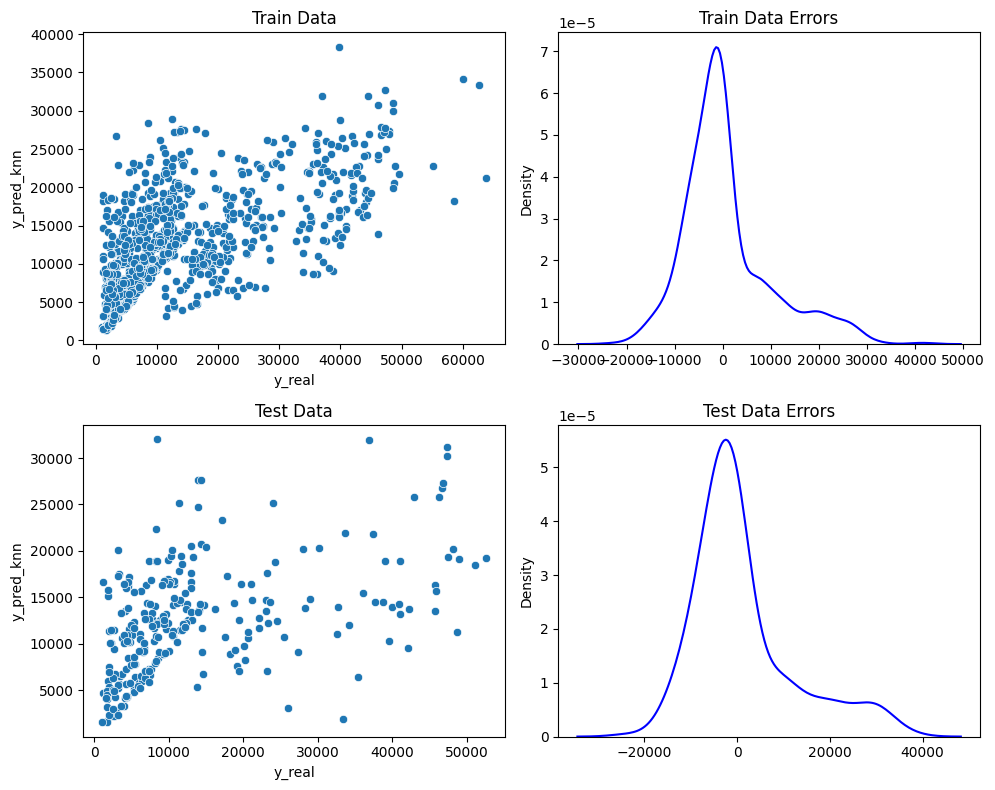

In [50]:
# Assuming you have x_train, y_train, x_test, y_test, knn defined somewhere

# Create results DataFrame
results = pd.DataFrame({
    "Set": ["Train"] * x_train.shape[0] + ["Test"] * x_test.shape[0],
    "y_real": y_train.values.tolist() + y_test.values.tolist(),
    "y_pred_knn": knn.predict(x_train).tolist() + knn.predict(x_test).tolist()
})

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot for training data
sns.scatterplot(data=results[results["Set"] == "Train"], x="y_real", y="y_pred_knn", ax=ax1)
ax1.set_title('Train Data')

# Distribution plot for training data errors
train_errors = results[results["Set"] == "Train"]["y_real"] - results[results["Set"] == "Train"]["y_pred_knn"]
sns.distplot(train_errors, hist=False, color='b', ax=ax2)
ax2.set_title('Train Data Errors')

# Scatter plot for test data
sns.scatterplot(data=results[results["Set"] == "Test"], x="y_real", y="y_pred_knn", ax=ax3)
ax3.set_title('Test Data')

# Distribution plot for test data errors
test_errors = results[results["Set"] == "Test"]["y_real"] - results[results["Set"] == "Test"]["y_pred_knn"]
sns.distplot(test_errors, hist=False, color='b', ax=ax4)
ax4.set_title('Test Data Errors')

plt.tight_layout()
plt.show()

In [51]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 3930.333273901141
MSE: 31845929.13415943
RMSE: 5643.219748880902
R2 Score: 0.7998747145449959


In [52]:
mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
r2_score_knn = knn.score(x_test, y_test)

print('MAE:', round(mae, 2))
print('MSE:', round(mse, 2))
print('RMSE:', round(rmse, 2))
print('R2 Score:', round(r2_score_knn, 2))

MAE: 7606.68
MSE: 123331807.06
RMSE: 11105.49
R2 Score: 0.22


RandomForestRegressor

/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62190/2754821782.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_errors, hist=False, color='b', ax=ax2)
/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62190/2754821782.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

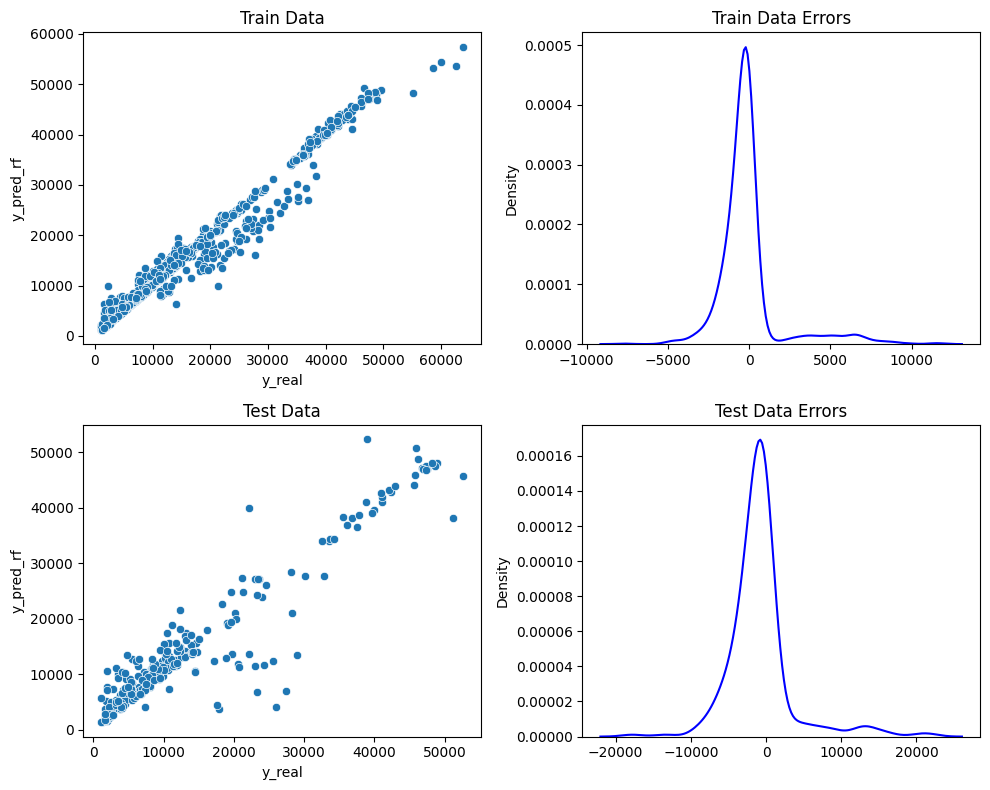

In [53]:
# Assuming you have x_train, y_train, x_test, y_test, RF defined somewhere

# Create results DataFrame
results = pd.DataFrame({
    "Set": ["Train"] * x_train.shape[0] + ["Test"] * x_test.shape[0],
    "y_real": y_train.values.tolist() + y_test.values.tolist(),
    "y_pred_rf": rf.predict(x_train).tolist() + rf.predict(x_test).tolist() 
})

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot for training data
sns.scatterplot(data=results[results["Set"] == "Train"], x="y_real", y="y_pred_rf", ax=ax1)
ax1.set_title('Train Data')

# Distribution plot for training data errors
train_errors = results[results["Set"] == "Train"]["y_real"] - results[results["Set"] == "Train"]["y_pred_rf"]
sns.distplot(train_errors, hist=False, color='b', ax=ax2)
ax2.set_title('Train Data Errors')

# Scatter plot for test data
sns.scatterplot(data=results[results["Set"] == "Test"], x="y_real", y="y_pred_rf", ax=ax3)
ax3.set_title('Test Data')

# Distribution plot for test data errors
test_errors = results[results["Set"] == "Test"]["y_real"] - results[results["Set"] == "Test"]["y_pred_rf"]
sns.distplot(test_errors, hist=False, color='b', ax=ax4)
ax4.set_title('Test Data Errors')

plt.tight_layout()
plt.show()

In [54]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Accuracy:', rf.score(x_test,y_test))

MAE: 2603.8141363177547
MSE: 19108722.41715752
RMSE: 4371.352470020865
Accuracy: 0.8799175080650377


In [55]:
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)
r2_score_rf = rf.score(x_test, y_test)

print('MAE:', round(mae, 2))
print('MSE:', round(mse, 2))
print('RMSE:', round(rmse, 2))
print('R2 Score:', round(r2_score_rf, 2))

MAE: 2603.81
MSE: 19108722.42
RMSE: 4371.35
R2 Score: 0.88


In [56]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for KNN using GridSearchCV
knn_params = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_classifier = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_classifier, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# Hyperparameter tuning for Random Forest using GridSearchCV
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
rf_classifier = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_classifier, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Evaluate the best models on the validation set
knn_pred = best_knn.predict(X_val)
rf_pred = best_rf.predict(X_val)

knn_accuracy = accuracy_score(y_val, knn_pred)
rf_accuracy = accuracy_score(y_val, rf_pred)

print("KNN Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


KNN Accuracy: 1.0
Random Forest Accuracy: 1.0


/Users/lenovo1/final_project/final_project_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/lenovo1/final_project/final_project_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/lenovo1/final_project/final_project_env/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/lenovo1/final_project/final_project_env/lib/python3.10/site-packages/

## Conclusion
From the above models, we can see that K-Nearest Neighbors(KNN) and Linear regression are giving the best results. Therefore, I will use K-Nearest Neighbors(KNN) to predict the medical expense of patients.


Moreover, the medical expense of smokers is higher than that of non-smokers. The medical expense of patients with BMI greater than 30 is higher than that of patients with BMI less than 30. The medical expense of older patients is higher than that of younger patients.

Thus, from the overall analysis, we can conclude that the medical expense of patients depends on their age, BMI, smoking habits.